In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

***古典线性回归***

In [3]:
df = pd.read_excel('/Users/lihaohan/因子选股/人工智能选股/intern/统计学习/计量经济学/上证指数与沪深300.xlsx')
df['日期'] = pd.to_datetime(df['日期'])
df.head()

,日期,hs300,sz
0,2018-01-02,4087.4012,3348.3259
1,2018-01-03,4111.3925,3369.1084
2,2018-01-04,4128.8119,3385.7102
3,2018-01-05,4138.7505,3391.7501
4,2018-01-08,4160.1595,3409.4795


In [6]:
df[['hs300', 'sz']].describe()

,hs300,sz
count,460.000000,460.000000
mean,3664.266460,2930.237842
std,333.651406,243.874533
min,2964.842100,2464.362800
25%,3364.816625,2746.438775
50%,3762.250200,2917.781900
75%,3897.218650,3095.709675
max,4389.885300,3559.465300


In [13]:
from pylab import mpl
# 防止图形中文文字乱码
mpl.rcParams['font.sans-serif'] = ['PingFang HK']   
mpl.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题

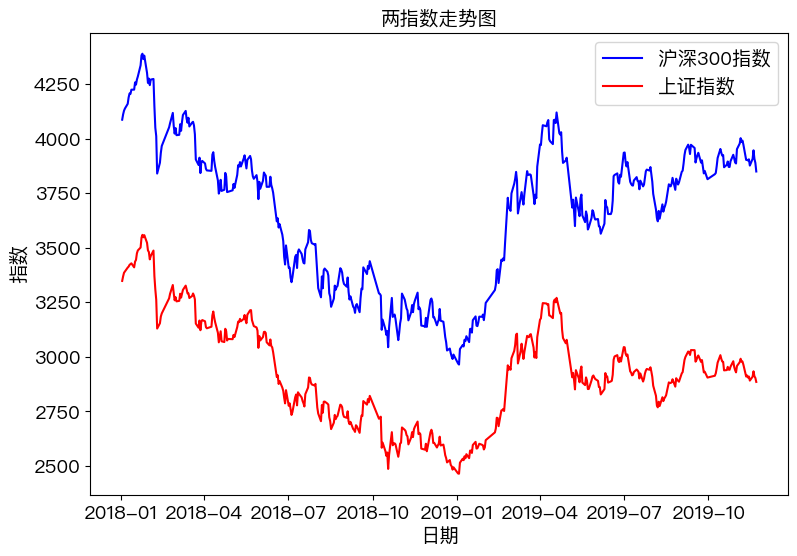

In [14]:
plt.figure(figsize=(9,6))
plt.title('两指数走势图', fontsize=14)
plt.plot(df['日期'], df['hs300'], color='blue', label='沪深300指数')
plt.plot(df['日期'], df['sz'], color='red', label='上证指数')
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('日期', fontsize=14)
plt.ylabel('指数', fontsize=14)
plt.show()

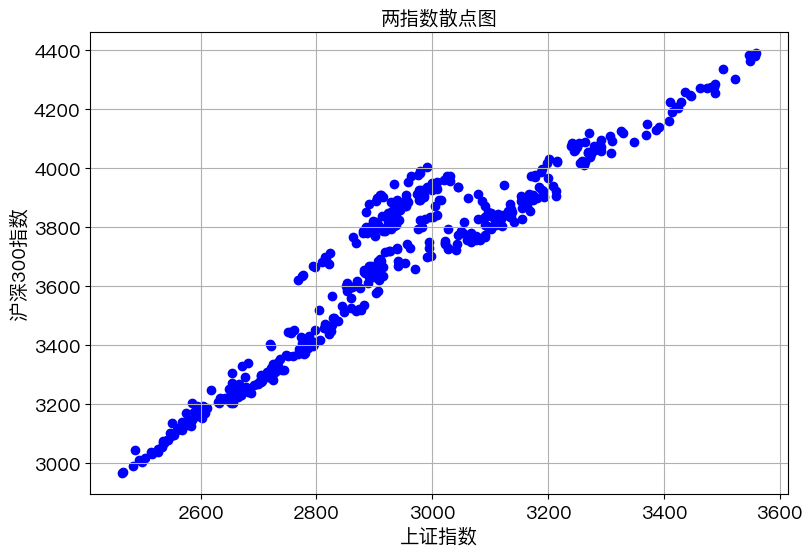

In [15]:
plt.figure(figsize=(9,6))
plt.scatter(x=df['sz'], y=df['hs300'], c='b', marker='o')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('两指数散点图', fontsize=14)
plt.xlabel('上证指数', fontsize=14)
plt.ylabel('沪深300指数', fontsize=14)
plt.grid()

古典线性回归模型的假定
假定1:线性假定
假定2:严格外生性
假定3:不存在严重多重共线性 即X满列秩
假定4:球型扰动项 即扰动项同方差，无自相关性

hs300 = c + beta * sz

In [18]:
n = df.shape[0]
beta = np.array(df['sz']).reshape(n,1)
c = np.ones((n,1))
X = np.hstack((c, beta)) #hstack()在行上合并, vstack在列上合并
y = np.array(df['hs300']).reshape(n,1)

b = np.linalg.inv(X.T @ X) @ X.T @ y
print('OLS估计值为: \n', b)

OLS估计值为: 
 [[-124.69031687]
 [   1.29305435]]


In [20]:
# 残差e
e = y - X @ b

用样本扰动项去估计总体扰动项方差

In [22]:
K = X.ndim
SSE = e.T @ e
s2 = SSE / (n - K)

import math
s = math.sqrt(s2)

print('平方和', SSE)
print('扰动项方差', s2)
print('扰动项标准差', s)

平方和 [[5453855.41555514]]
扰动项方差 [[11907.98125667]]
扰动项标准差 109.12369704454947


/var/folders/t7/w_83l6_15xs529n5_m3v63x00000gn/T/ipykernel_38893/1728053497.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s = math.sqrt(s2)


估计b的方差 - 协方差矩阵

In [23]:
Varb = s2 * np.linalg.inv(X.T @ X)
# sigma ^ 2 * (X.T @ X) ^ -1
print('协方差矩阵: \n', Varb)

协方差矩阵: 
 [[ 3.77128774e+03 -1.27819004e+00]
 [-1.27819004e+00  4.36206925e-04]]


In [24]:
from scipy.stats import t

alpha = 0.05 #置信度
nu = max(0, n-K) #自由度
tval = t.ppf(1 - alpha / 2, nu) #逆函数值 计算t分布的临界值
SE_b = np.sqrt(np.diag(Varb)).reshape(K, 1)
bint = np.hstack((b - tval * SE_b, b + tval * SE_b))

print('95% 置信区间: \n', bint )

95% 置信区间: 
 [[-245.37220852   -4.00842522]
 [   1.25201092    1.33409777]]


In [25]:
t_stat = b / SE_b
t_p = 2 * (1 - t.cdf(abs(t_stat), n-K))

print('t检验为: \n', t_stat)
print('\n')
print('p值为: \n', t_p)

t检验为: 
 [[-2.0304294 ]
 [61.91138223]]


p值为: 
 [[0.0428902]
 [0.       ]]


两类错误:
1. 弃真
2. 存伪

In [26]:
mod = sm.OLS(y, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     3833.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          1.20e-224
Time:                        15:58:12   Log-Likelihood:                -2810.3
No. Observations:                 460   AIC:                             5625.
Df Residuals:                     458   BIC:                             5633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.6903     61.411     -2.030      0.043    -245.372      -4.008
x1             1.2931      0.021     61.911      0.000       1.252       1.334
==============================================================================
Omnibus:                       61.627   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.387
Skew:                           1.031   Prob(JB):                     7.81e-19
Kurtosis:                       2.692   Cond. No.                     3.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
res.params

array([-124.69031687,    1.29305435])

In [28]:
res.bse #标准差

array([6.14108113e+01, 2.08855674e-02])

In [29]:
resid = res.resid
print(resid[:5])

[-117.4758394  -120.35744134 -124.40507098 -122.27638992 -123.79246764]


In [31]:
res.cov_params()

array([[ 3.77128774e+03, -1.27819004e+00],
       [-1.27819004e+00,  4.36206925e-04]])

In [34]:
res.f_test('x1 = 0') #Wald检验

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3833.019249909659, p=1.1954068278964325e-224, df_denom=458, df_num=1>

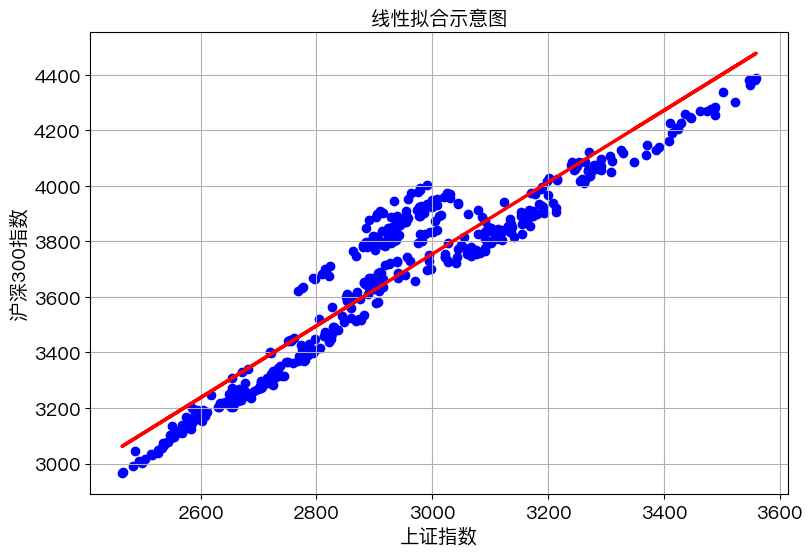

In [35]:
plt.figure(figsize=(9,6))
plt.scatter(x=df['sz'], y=df['hs300'], c='b', marker='o')
plt.plot(df['sz'], res.params[0]+res.params[1]*df['sz'], '-r', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('线性拟合示意图', fontsize=14)
plt.xlabel('上证指数', fontsize=14)
plt.ylabel('沪深300指数', fontsize=14)
plt.grid()

***收益率的平稳性***

对数收益率: rt = lnPt - lnP(t-1)
严平稳：变量的联合分布在时间的平移变换下保持不变
弱平稳：均值和协方差不随t的改变而改变
若时间序列存在单位根，则为非平稳序列 -> problem:
1. 自回归系数的估计值左偏于0
2. 传统t test失效
3. 两个相互独立的单位根变量可能出现伪回归或伪相关

In [37]:
df['sz_return'] = 100 * np.log(df['sz'] / df['sz'].shift(1))
df.dropna(inplace=True)
df.head()

,日期,hs300,sz,sz_return
1,2018-01-03,4111.3925,3369.1084,0.618765
2,2018-01-04,4128.8119,3385.7102,0.491555
3,2018-01-05,4138.7505,3391.7501,0.178235
4,2018-01-08,4160.1595,3409.4795,0.521360
5,2018-01-09,4189.2977,3413.8996,0.129558


ADF 检验

In [38]:
import statsmodels.tsa.stattools as ts
ts.adfuller(df['sz'])

(-2.306940042296821,
 0.16973943854299955,
 7,
 451,
 {'1%': -3.444932949082776,
  '5%': -2.867969899953726,
  '10%': -2.57019489663276},
 4390.386487977853)

In [39]:
from arch.unitroot import ADF
ADF(df['sz'])

Test Statistic,-2.307
P-value,0.170
Lags,7


KPSS 平稳性检验

In [40]:
ts.kpss(df['sz'], nlags='auto')

/var/folders/t7/w_83l6_15xs529n5_m3v63x00000gn/T/ipykernel_38893/3017722055.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  ts.kpss(df['sz'], nlags='auto')


(0.8735590412113318,
 0.01,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [41]:
from arch.unitroot import KPSS
KPSS(df['sz'])

Test Statistic,0.874
P-value,0.005
Lags,12


DFGLS 检验

In [42]:
from arch.unitroot import DFGLS
DFGLS(df['sz'])

Test Statistic,-0.563
P-value,0.492
Lags,7


PhillipsPerron(PP) 检验

In [43]:
from arch.unitroot import PhillipsPerron
PhillipsPerron(df['sz'])

Test Statistic,-2.108
P-value,0.241
Lags,18
